In [1]:
#Import the needed libraries
import numpy as np
from scipy.integrate import quad
import matplotlib.pylab as plt

from fakequadrature import quadrature_weights

We want to compute the integral over the interval $[-2,2]$ of the *Runge* function
$$f(x) = \frac{1}{4x^2+1}$$

in three different ways:

 1. Using equispaced samples and computing the quadrature weights;
 2. Using Chebyshev-Lobatto samples and computing the quadrature weights;
 3. Using the same samples as in (1.) but with fake nodes quadrature weights with mapping $S$.

In [2]:
# Define the test function
f = lambda y: 1/(1+4*y**2)

In [3]:
# Define the parameters
a, b = -2, 2 # Integration interval
LenFor = 40 # Maximum degree for the polynomial interpolation

We choose the mapping 
 $$ S(x)= -2 \cos\left( \pi \frac{x+2}{4} \right).$$
which maps the equispaced nodes into the Chebyshev-Lobatto points.

In [4]:
# Define the mapping function
def S(x):
    return -((b-a)/2)*np.cos(np.pi*(x-a)/(b-a)) + (b+a)/2

We now compute the approximate integral values with the three methods for a number of nodes spanning from 2 to 40. We also compute each absolute error to compare the methods.

Note that we did not call the function `quadrature_weights` to compute the weights in the case of fake nodes, because we already know that they are given by the vector 
$$wf = \left( \frac{1}{2}, 1 , 1, \dots, 1 , 1, \frac{1}{2} \right).$$
See the proof in the paper linked in the [README](README.md)

In [5]:
# Compute the true integral
Itrue, _ = quad(f,a,b)

In [6]:
Err, ErrCL, Errf = [], [], [] # Initialize
# Compute the weights and approximate the integral
for Deg in np.arange(1,LenFor,2):
    # Define the degree and the equispaced nodes
    N_nodes = Deg+1
    x = np.linspace(a,b,N_nodes)
    xCL = S(x) #Chebyshev-Lobatto pts
    # Define the funtion values for equispaced and CL nodes
    y = f(x)
    yCL = f(xCL)
    # Compute the weights for the fake nodes approach
    wf = (b-a)*np.ones((N_nodes))/Deg
    wf[0] /= 2; wf[-1] /= 2
    # Compute the standard and CL weights
    w = quadrature_weights(x, (a,b))
    wCL = quadrature_weights(xCL, (a,b))

    # Approximate the integrals
    I  = y.dot(w)
    ICL  = yCL.dot(wCL)
    If  = y.dot(wf)
    # Compute the errors
    err = np.abs(I-Itrue)
    errCL = np.abs(ICL-Itrue)
    errf = np.abs(If-Itrue)
    Err.append(err)
    ErrCL.append(errCL)
    Errf.append(errf)

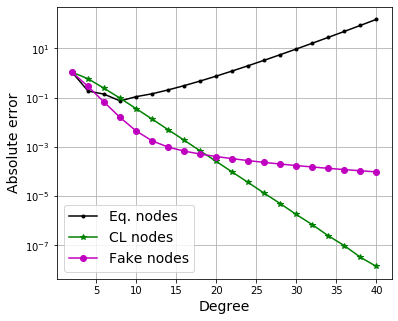

In [7]:
# Plotting tools
fig, ax = plt.subplots(1, 1,figsize=(6,5))
ax.cla()
asc = list(1+np.arange(1,LenFor,2))
ax.semilogy(asc,Err,'.-k',asc,ErrCL,'*-g',asc,Errf,'o-m')
ax.set_xlabel("Degree", fontsize = 14)
ax.set_ylabel("Absolute error", fontsize = 14)
ax.legend(["Eq. nodes","CL nodes","Fake nodes"],loc = 'best', fontsize = 14)
ax.grid(True)
plt.savefig("rungefig.png")
plt.show()

From this plot we get that the Fake Nodes approach for computing integrals is the best over the three if the nuber of nodes is less than 18, then the pure CL nodes shows a smaller error. This is consistent with results on [polynomial interpolation](https://github.com/pog87/FakeNodes/blob/master/Runge.ipynb). 